# 클러스터 분석

## C.2 문제의 이해

클러스터링은 **Unsupervised learning** 기법이다. 
의사결정트리, kNN 등과 같이 답을 미리 정해놓고 사례를 훈련해서 모델링을 할 필요가 없다.
클러스터링은 훈련없이, 데이터를 그룹화거나 클러스터로 군집화하게 된다.
데이터를 특징에 따라 보다 가까운 클러스터로 할당해 묶게 된다.

<!--이런 기법이 유용하게 사용되는 분야는 다양하다.
예를 들어, 소비자를 서로 다른 특징을 가진 세그먼트로 분류해 보다 유용한 마케팅 기법을 적용할 수 있게 한다.
또는 병원에서 환자를 특징으로 분류해, 암, 파킨슨이나 정신병의 환자를 진단하거나 처치에 활용하기도 한다.-->

## C.3 클러스터링 종류

### C.3.1 분할 클러스터링

분할 클러스터링 Partitioning clustering에서는 클러스터의 개수 **k를 미리 정하고**, 데이터를 k의 그룹으로 구분한다.
k 그룹은 완전하게 분리되어, 어떤 데이터이든 여러 그룹에 속해 있을 수 없다.  
클러스터는 데이터의 평균으로 계산된 중심점을 가지게 된다.
따라서 평균에서 멀리 떨어진 이상 값, **outlier에 영향**을 받는다는 단점이 있다.
**k-Means**가 대표적인 분할 클러스터링 기법이다.

### C.3.2 계층 클러스터링

계층 클러스터링 hierarchical clustering
미리 클러스터의 개수를 지정할 필요가 없다.
**Dendrogram**이라고 하는 나무 가지모양으로 데이터를 구분한다.

### C.3.2 밀집도 기반 클러스터링

밀집도 기반 클러스터링 Density-based clustering은 특정 지역에서의 집적 정도에 따라 클러스터를 구분하는 기법이다. **클러스터의 개수를 미리 지정할 필요 없다**. 다만 지역으로 분포된 가운데 데이터가 많이 집적된 곳을 그렇지 않은 곳을 hot spot으로 구분하여 클러스터로 인식하는 것이다.
**DBSCAN**을 예로 들 수 있다.

## C.4 k-Means

### C.4.1 알고리즘

* 군집의 갯수 k를 정하고, 중심점 $C_k$을 정한다. 이 중심점은 반복하면서 갱신하게 된다.
* 반복:
    * 할당 단계: 각 데이터 항목을 중심점과 얼마나 멀리 있는지 계산하여, 클러스터에 할당
        * 모든 데이터  ${x_1,x_2,\cdots,x_n}\in D$에 대해 반복
            * 각 데이터 $x_n$에서 각 클러스터 $C_k$ 거리를 계산 $dist(x_n,m_k)=\|x_n-m_k\|$ ($m_k$는 $C_k$ 평균을 말한다)
            * $x_n$을 가장 가까운 클러스터 $C_k$에 할당
    * 갱신 단계:
        * 현재 클러스터에 할당된 데이터로의 평균을 계산하여 새로운 클러스터 $C_k$의 중심점$m_k$를 설정
    * 종료 단계:
        * 갱신이 더 이상 없으면 종료

### C.4.2 구현

#### 데이터

다음과 같은 데이터가 있다고 하자.

구분 | 1 | 2 |...|...|...|...|...|...|n 
--|---|---|---|---|---|---|---|---|---
x | 2 | 3 | 2 | 5 | 7 | 8 | 9 | 8 | 7
y | 5 | 6 | 4 | 7 | 2 | 3 | 4 | 4 | 3

numpy 배열로 데이터를 구성하자.

In [1]:
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

#### 단계 1: 설정

클러스터는 군집의 가운데 있는 점으로, 몇 개로 할 것인지 결정해야 한다.  
클러스터의 적당한 개수는 통계적으로 결정할 수도 있다.
또한 그 중심점을 어떻게 선정할 것인지 결정해야 하는데, 무작위로 하거나 또는 임의로 데이터를 선정할 수 있다.

2개로 설정해 놓자.

In [2]:
k = 2

k=2에 따라, centeroid를 임의로 선택한다.

In [3]:
centroids = np.array([[2,5],[7,2]], dtype = float) #임의로 선택함(무작위로 해도 됨)

### 단계 2: 할당

각 데이터 항목을 중심점과 얼마나 멀리 있는지 계산하여, 클러스터에 할당한다.

#### 거리 계산: ```norm()```

```norm()``` 함수의 default는 L2라서 생략할 수 있고, Eculdean distance과 동일하다.

In [4]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193 #식으로 구하기
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

#### 거리를 계산하여 가까운 중심점에 할당

x는 $2 \times 9$ 행렬이다. 첫째 데이터에 대해서 거리를 계산해서, 가까운 중심점에 할당해보자.

x[0]으로부터 중심점까지의 거리를 구해보자.

In [5]:
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]


그러면 어느 쪽으로 할당되어야 할까?
당연히 거리가 짧은 중심점에 배정이 되어야 한다.
swap 알고리즘으로 최소 길이를 고르자.
swap에 필요한 np.inf는 양수의 무한 값으로 임의의 최대 값을 가진다.

In [6]:
minDist = np.inf
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))
    # pick the closest centroid
    if distJ0 < minDist:
        minDist = distJ0
        minIndex = j
print (".....Assigning {} to {}th centroid by {:.3f}".format(x[0], minIndex, minDist))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]
.....Assigning [2. 5.] to 0th centroid by 0.000


#### 모든 데이터에 대해 거리를 계산하고 가까운 중심점에 할당.

clustering 처리결과를 저장하기 위한 저장소를 설정한다.
clusterAssigned에는 index, 거리를 저장한다.

In [7]:
clusterAssigned = np.zeros(shape = (x.shape[0],2), dtype = float) # 저장소 생성, 0으로 초기화
print (clusterAssigned)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


각 데이터의 거리를 계산하면, 아래 표와 같이 4개는 C1, 아래 5개는 C2에 할당된다.

x | y | C1 [2,5] | C2 [7,2]
-----|-----|-----|-----
2 | 5 | 0.000 | 
3 | 6 | 1.414 | 
2 | 4 | 1.000 | 
5 | 7 | 3.606 | 
7 | 2 |  | 0.000
8 | 3 |  | 1.414
9 | 4 |  | 2.828
8 | 4 |  | 2.236
7 | 3 |  | 1.000


In [8]:
x.shape

(9, 2)

In [9]:
row, c = x.shape
for i in range(row):
    minDist = np.inf   # arbitray max
    minIndex = -1      # arbitray index
    for j in range(k):
        # distance from centroids[j] to x[i]
        distJI = normDist(centroids[j], x[i])
        # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
        # pick the closest centroid
        if distJI < minDist:
            minDist = distJI
            minIndex = j
    print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
    clusterAssigned[i] = [minIndex, minDist]   #-----changed

.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000


각 클러스터에 할당된 인덱스와 거리를 출력해보자.

In [10]:
print (".....Assigned clusters: \n{}".format(clusterAssigned))

.....Assigned clusters: 
[[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]


### 단계 3: 갱신

현재 클러스터에 할당된 데이터로의 평균 $m_k$을 계산하여 새로운 클러스터 $C_k$의 중심점을 설정한다.  
새로운 중심점을 구하기 위해서는, **각 중심점에 할당된 데이터들을 모아서 평균을 계산**해야 구할 수 있다.
앞서 clusterAssigned에는 할당된 인덱스와 거리를 저장해 놓았다.

In [11]:
clusterAssigned[:,0]

array([0., 0., 0., 0., 1., 1., 1., 1., 1.])

첫 번째 중심점에 할당된 데이터를 출력해 보자.

In [12]:
x[clusterAssigned[:,0]==0]

array([[2., 5.],
       [3., 6.],
       [2., 4.],
       [5., 7.]])

두 번째 중심점에 할당된 데이터를 출력해 보자.

In [13]:
x[clusterAssigned[:,0]==1]

array([[7., 2.],
       [8., 3.],
       [9., 4.],
       [8., 4.],
       [7., 3.]])

각 중심점에 할당된 평균으로 새로운 중심점을 계산한다.

In [14]:
_centroids=np.zeros(shape=(k,x.shape[1]), dtype=float)

In [15]:
for cent in range(k):
    _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0) #세로로 평균 구함: 0, 가로로 평균 구함: 1

In [16]:
print ("Centroids updated: \n", _centroids)

Centroids updated: 
 [[3.  5.5]
 [7.8 3.2]]


### 단계 4: 종료

반복을 종료할 것인지 확인한다.
소수점을 비교할 경우, 자리수의 정밀도에 따라 동일한 값인지 확인하기 어려울 수 있다.
np.equal() 함수를 사용해서 중심점이 갱신되었는지 확인하게 된다.

In [36]:
comparison = np.equal(centroids, _centroids)
print(comparison.all())
# 중심점이 계산이 안되었다->이제 종료

True


또는 np.isclose()는 tolerence를 어느 정도 허용하면서 동일한지 비교하므로 사용할 수 있다. 

In [37]:
comparison = np.isclose(centroids, _centroids)
print(comparison.all())

True


그래프를 그리면 클러스터링을 직관적으로 보다 쉽게 이해할 수 있다.

파란점으로 데이터 좌표를, 중심점은 빨간 색으로 그려보자.

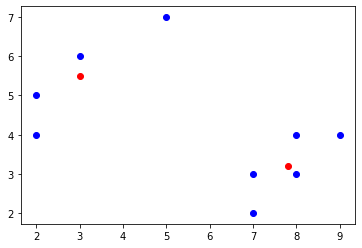

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(centroids[:,0],centroids[:,1],color='red')

## C.5 함수로 만들기

### 거리 계산 함수

두 점 사이의 거리를 계산하는 함수이다.

In [20]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

### 클라스터링 함수

알고리즘을 정리하면 다음과 같다.

```python
while 무한반복 시작
    for 행 갯수만큼 반복
        최소길이 초기화
        최소인덱스 초기화
        for 중심점 개수만큼 반복
            중심값과 각 데이터 거리 계산
            if 최소 거리값이면, 그 클러스터에 할당
                최소값 갱신
                최소인덱스 갱신
        if 클러스터가 변경되지 않았으면:
            무한반복 종료
        else: 무한반복 계속
```

In [21]:
def cluster(x, k, centroids): #x,k, 초기중심점
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, k), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

### 그래프

데이터의 파란 색으로 산포하고 빨간색으로 중심점을 찍는 그래프를 작성하는 함수이다.

In [22]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

아래 데이터로 실행해보자.
데이터의 초기 중심점으로 결과가 다르게 나올 수 있다는 점에 유의하자.



====== Iteration 1 ======
.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000

.....Assigned clusters: 
 [[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]

.....Updating Centroids
 [[2. 5.]
 [7. 2.]] => 
[[3.  5.5]
 [7.8 3.2]]


====== Iteration 2 ======
.....Assigning [2. 5.] to 0th centroid by 1.118
.....Assigning [3. 6.] to 0th centroid by 0.500
.....Assigning [2. 4.] to 0th centroid by 1.803
.....Assigning [5. 7.] to 0th centroid by 2

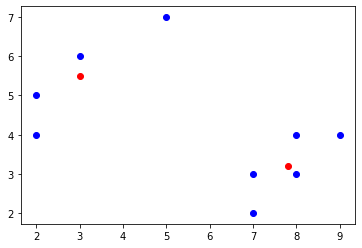

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)
#x = np.array([[1, 2],[1, 4],[1, 0],[4, 2],[4, 4],[4, 0]])
k = 2
centroids = np.array([[2,5],[7,2]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = cluster(x, k, centroids)
draw(x, centroids)